# MLOps Zoomcamp - Homework #1

In [78]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
df1 = pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')
df2 = pd.read_parquet('./data/fhv_tripdata_2021-02.parquet')

### Question 1: Number of records in Jan 2021 FHV data

In [9]:
print(len(df1))

1154112


### Question 2: Average duration in Jan 2021 FHV

In [10]:
df1.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [12]:
df1.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
dtype: object

In [22]:
df1['duration'] = df1["dropOff_datetime"] - df1["pickup_datetime"]

In [24]:
df1.duration = df1.duration.apply(lambda td: td.total_seconds()/60)

In [25]:
df1.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667


/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

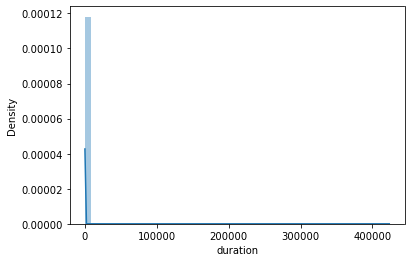

In [29]:
sns.distplot(df1.duration)

In [27]:
print(round(df1.duration.mean(),2))

19.17


## Data Preparation

### Question 3: Fraction of missing values

In [36]:
df1 = df1[(60>=df1['duration']) & (df1['duration'] >=0)]

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

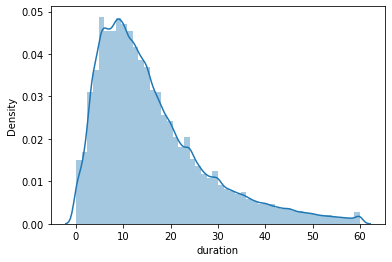

In [38]:
sns.distplot(df1.duration)

In [39]:
df1.describe()

,PUlocationID,DOlocationID,duration
count,189143.000000,975960.000000,1.124850e+06
mean,139.552873,135.555487,1.603365e+01
std,74.748965,80.342685,1.162009e+01
min,1.000000,1.000000,1.666667e-02
25%,75.000000,66.000000,7.616667e+00
50%,143.000000,132.000000,1.305000e+01
75%,206.000000,213.000000,2.128333e+01
max,265.000000,265.000000,6.000000e+01


In [43]:
df1 = df1[['PUlocationID', 'DOlocationID','duration']]

In [46]:
100*df1.isna().sum()/len(df1)

PUlocationID    83.185047
DOlocationID    13.236432
duration         0.000000
dtype: float64

In [54]:
print(f"Fraction of missing values PU_ID {round(100*df1['PUlocationID'].isna().sum()/len(df1),2)}")

Fraction of missing values PU_ID 83.19


In [57]:
df1 = df1.replace(np.nan, -1)

### Question 4: Dimensionality after OHE

In [61]:
categorical = ['PUlocationID', 'DOlocationID']
#numerical = ['duration']

In [62]:
df1[categorical] = df1[categorical].astype(str)

In [63]:
train_dicts = df1[categorical].to_dict(orient='records')

In [64]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [65]:
X_train.shape

(1124850, 525)

In [72]:
y_train = df1['duration'].values

In [66]:
print(f"The dimensionality of this matrix is {X_train.shape[1]}")

The dimensionality of this matrix is 525


### Question 5: RMSE on train

In [73]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred = lr.predict(X_train)

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


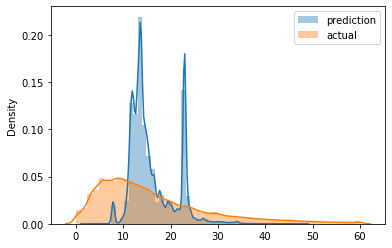

In [77]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')
plt.legend()

In [92]:
train_rmse = mean_squared_error(y_train, y_pred, squared=False)

print(f"The RMSE on train is {round(train_rmse,2)}")

The RMSE on train is 10.63


### Question 6: RMSE on validation

In [86]:
def preproc(df):
    df['duration'] = df["dropOff_datetime"] - df["pickup_datetime"]
    df.duration = df.duration.apply(lambda td: td.total_seconds()/60)
    df = df[(60>=df['duration']) & (df['duration'] >=0)]
    df = df[['PUlocationID', 'DOlocationID','duration']]
    df = df.replace(np.nan, -1)
    
    categorical = ['PUlocationID', 'DOlocationID']
    df[categorical] = df[categorical].astype(str)
    
    dicts = df[categorical].to_dict(orient='records')
    y = df['duration'].values
    return dicts, y

def get_data(df_train, df_test):
    train_dicts, y_train = preproc(df_train)
    test_dicts, y_test = preproc(df_test)
    
    dv = DictVectorizer()
    X_train = dv.fit_transform(train_dicts)
    X_test = dv.transform(test_dicts)
    return X_train, y_train, X_test, y_test

In [89]:
X_train, y_train, X_test, y_test = get_data(df1, df2)

In [90]:
y_pred_test = lr.predict(X_test)

In [93]:
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print(f"The RMSE on train is {round(test_rmse,2)}")

The RMSE on train is 11.12
